### Importing relevant libraries and modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(0)

from src.regression_module import MultipleLinearRegression
from src.utils import utils

### Data reading, preprocessing, splitting and normalizing/standardizing

In [7]:
base_data_loc = "../data/regression"

In [8]:
# Function to retrieve the data location using name of data
def generate_file_location(name,base_data_loc=base_data_loc):
    return os.path.join(base_data_loc, name)

In [9]:
#Global variables
data_loc_dict = {'fish':generate_file_location("fish.csv"), 'insurance':generate_file_location("insurance.csv"),'real estate':generate_file_location("real_estate.csv"), 'physical activity':generate_file_location("physical_activity_obesity.csv")}
data_name = "fish"
category_col_list = "Species".split(",")
print("category_col_list is - ", category_col_list)
target_col_name = "Weight"
print(f"target column for this data is: ", target_col_name)

category_col_list is -  ['Species']
target column for this data is:  Weight


#### Generating an object from utils module

In [10]:
utils_obj = utils(data_name, data_loc_dict, category_col_list, target_col_name)

#### Reading data

In [11]:
df_inp = utils_obj.read_data()
print(df_inp.shape)
print(df_inp.head())

(159, 7)
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


#### dropping the category columns from input data for simplicity and moving the target column to last column of dataframe

In [12]:
#
df_final = utils_obj.drop_category_cols(df_inp)
print(df_final.head())

DF after dropping ['Species'] categorical columns
   Length1  Length2  Length3   Height   Width  Weight
0     23.2     25.4     30.0  11.5200  4.0200   242.0
1     24.0     26.3     31.2  12.4800  4.3056   290.0
2     23.9     26.5     31.1  12.3778  4.6961   340.0
3     26.3     29.0     33.5  12.7300  4.4555   363.0
4     26.5     29.0     34.0  12.4440  5.1340   430.0


#### Splitting the data into development and validation and separating the X and y for development and validation data

In [14]:

x_dev, y_dev, x_val, y_val = utils_obj.dev_val_split(df_final, 0.7)
print(f"shape of dev data - independent variable - {x_dev.shape}, dependent variable - {y_dev.shape}")
print(f"shape of val data - independent variable - {x_val.shape}, dependent variable - {y_val.shape}")


dev data shape (117, 6)
val data shape (42, 6)
shape of dev data - independent variable - (117, 5), dependent variable - (117,)
shape of val data - independent variable - (42, 5), dependent variable - (42,)


#### Standardization (bringing the data on a scale of [0,1] using min-max scaling for smooth cost function curve)

In [18]:
standardize_x_dev, standardize_x_val = utils_obj.preprocessing_dev_val(x_dev, x_val,"standard")
print(f"shape of dev data - independent variable - {standardize_x_dev.shape}, dependent variable - {y_dev.shape}")
print(f"shape of val data - independent variable - {standardize_x_val.shape}, dependent variable - {y_val.shape}")
print("checking the preprocessing of standardization")
print("For dev:")
print(np.mean(standardize_x_dev,axis=0))
print(np.std(standardize_x_dev,axis=0))
print("For val:")
print(np.mean(standardize_x_val,axis=0))
print(np.std(standardize_x_val,axis=0))
print("\n")

Standardization preprocessing initiated:
shape of dev data - independent variable - (117, 5), dependent variable - (117,)
shape of val data - independent variable - (42, 5), dependent variable - (42,)
checking the preprocessing of standardization
For dev:
[-4.87739004e-16 -8.54017711e-16 -2.75183485e-16  5.86425495e-16
  2.01168616e-16]
[1. 1. 1. 1. 1.]
For val:
[0.04197268 0.03769349 0.0591067  0.18696553 0.08134236]
[1.26176425 1.2712215  1.27776777 1.18131311 1.29402903]




#### Normalization (Mean centering (mu~0) with unit standard deviation for smooth cost function curve)

In [19]:

normal_x_dev, normal_x_val = utils_obj.preprocessing_dev_val(x_dev, x_val,"normal")
print(f"shape of dev data - independent variable - {normal_x_dev.shape}, dependent variable - {y_dev.shape}")
print(f"shape of val data - independent variable - {normal_x_val.shape}, dependent variable - {y_val.shape}")
print("checking the preprocessing of normalization")
print("For dev:")
print(np.min(normal_x_dev,axis=0))
print(np.max(normal_x_dev,axis=0))
print("For val:")
print(np.min(normal_x_val,axis=0))
print(np.max(normal_x_val,axis=0))


Normaliztion preprocessing initiated:
shape of dev data - independent variable - (117, 5), dependent variable - (117,)
shape of val data - independent variable - (42, 5), dependent variable - (42,)
checking the preprocessing of normalization
For dev:
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
For val:
[-0.05434783 -0.04242424 -0.05343511 -0.01434207 -0.01441318]
[1.06521739 1.06868687 1.07633588 0.94860171 0.9504833 ]


### Running Linear Regression when the preprocessing is standardization

#### Steps to minimize the cost function of linear regression model
1. Initialize weights and bias_term as random
2. Forward propagate the input to output(prediction) using linear function and weights, bias term from step 1.
3. Compute cost using the prediction from step2.
4. Using the predictions from step2 backward propagate the error using gradient descent updating weights and bias term.
5. Repeat steps 2 top steps 4 for n number of iterations


In [22]:
np.random.seed(42)
num_iterations = 500
learning_rate = 0.01

rows, columns = standardize_x_dev.shape
weights = np.random.rand(columns)
bias_term = np.random.rand()
lr = MultipleLinearRegression(learning_rate, num_iterations, standardize_x_dev, y_dev)

cost_list = []
for i in range(num_iterations):
    y_pred = lr.forward_propagation(weights, bias_term)
    cost = lr.compute_cost(y_dev, y_pred)
    cost_list.append(cost)
    weights, bias_term = lr.backward_propagation(y_pred, standardize_x_dev, y_dev, weights, bias_term)


df_cost = pd.DataFrame(data=cost_list, columns=["cost"]).reset_index()
df_cost.columns = ["epochs", "cost"]
df_cost["epochs"] = df_cost["epochs"] + 1
df_cost.tail()

,epochs,cost
495,496,6166.329795
496,497,6166.267832
497,498,6166.206042
498,499,6166.144426
499,500,6166.082982


#### Plotting the cost as it goes down with increase in iterations

<AxesSubplot:title={'center':'Epochs vs cost'}, xlabel='epochs'>

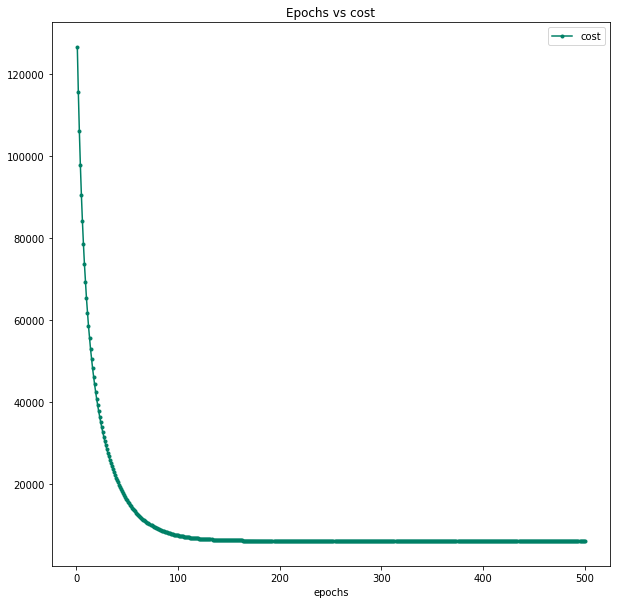

In [23]:
df_cost.plot(x="epochs",y="cost",title="Epochs vs cost",figsize=(10,10),colormap="summer", marker=".")

#### Printing the peformance of the linear regression model using metrics such as:
1. r_square
2. mean square error
3. mean absolute error
4. symmetric mean absolute percentage error
5. median absolute error

In [24]:
y_dev_pred = lr.predict(standardize_x_dev, weights, bias_term)
y_val_pred = lr.predict(standardize_x_val, weights, bias_term)

print("training data metrics:")
r_square, mse, mae, smape, med_ae = utils_obj.linear_regression_metrics(y_dev, y_dev_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

print("\n")

print("test data metrics:")
r_square, mse, mae, smape, med_ae = utils_obj.linear_regression_metrics(y_val, y_val_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

training data metrics:
r-square: 0.8907926747081903
mean square error: 12332.043419783975
mean absolute error: 82.01675167499809
SMAPE 40.97045338807335
median absolute error: 63.0290544919103


test data metrics:
r-square: 0.8341017422978775
mean square error: 26987.076536166056
mean absolute error: 120.67024880566785
SMAPE 56.05760983883915
median absolute error: 88.34701344695168


### Running Linear Regression when the preprocessing is normalization

#### Steps to minimize the cost function of linear regression model
1. Initialize weights and bias_term as random
2. Forward propagate the input to output(prediction) using linear function and weights, bias term from step 1.
3. Compute cost using the prediction from step2.
4. Using the predictions from step2 backward propagate the error using gradient descent updating weights and bias term.
5. Repeat steps 2 top steps 4 for n number of iterations


In [26]:
np.random.seed(42)
num_iterations = 2000
learning_rate = 0.01

rows, columns = normal_x_dev.shape
weights = np.random.rand(columns)
bias_term = np.random.rand()
lr = MultipleLinearRegression(learning_rate, num_iterations, normal_x_dev, y_dev)

cost_list = []
for i in range(num_iterations):
    y_pred = lr.forward_propagation(weights, bias_term)
    cost = lr.compute_cost(y_dev, y_pred)
    cost_list.append(cost)
    weights, bias_term = lr.backward_propagation(y_pred, normal_x_dev, y_dev, weights, bias_term)


df_cost = pd.DataFrame(data=cost_list, columns=["cost"]).reset_index()
df_cost.columns = ["epochs", "cost"]
df_cost["epochs"] = df_cost["epochs"] + 1
df_cost.tail()

,epochs,cost
1995,1996,6228.344390
1996,1997,6228.306705
1997,1998,6228.269123
1998,1999,6228.231642
1999,2000,6228.194262


#### Plotting the cost as it goes down with increase in iterations

<AxesSubplot:title={'center':'Epochs vs cost'}, xlabel='epochs'>

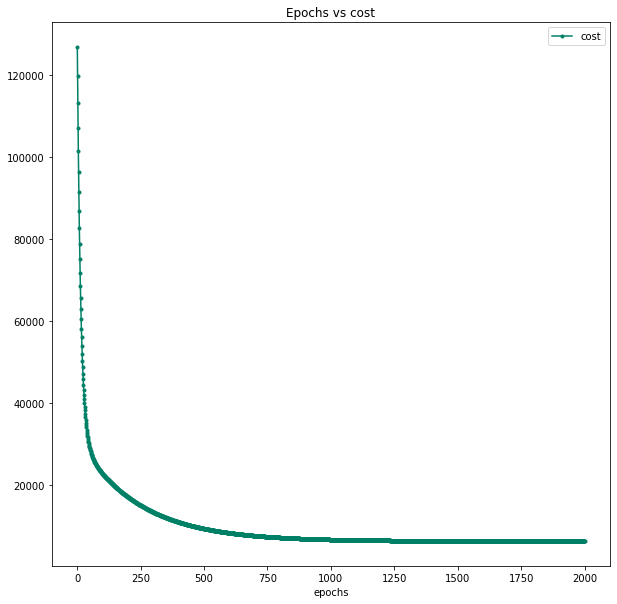

In [27]:
df_cost.plot(x="epochs",y="cost",title="Epochs vs cost",figsize=(10,10),colormap="summer", marker=".")

#### Printing the peformance of the linear regression model using metrics such as:
1. r_square
2. mean square error
3. mean absolute error
4. symmetric mean absolute percentage error
5. median absolute error

In [28]:
y_dev_pred = lr.predict(normal_x_dev, weights, bias_term)
y_val_pred = lr.predict(normal_x_val, weights, bias_term)

print("training metrics:")
r_square, mse, mae, smape, med_ae = utils_obj.linear_regression_metrics(y_dev, y_dev_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

print("\n")

print("test data metrics:")
r_square, mse, mae, smape, med_ae = utils_obj.linear_regression_metrics(y_val, y_val_pred)
print("r-square:", r_square)
print("mean square error:", mse)
print("mean absolute error:", mae)
print("SMAPE", smape)
print("median absolute error:", med_ae)

training metrics:
r-square: 0.8896921876731517
mean square error: 12456.31396539749
mean absolute error: 83.00500973475987
SMAPE 40.96754761712774
median absolute error: 65.61045427373574


test data metrics:
r-square: 0.8395942625528838
mean square error: 26093.594792889122
mean absolute error: 120.68755623701388
SMAPE 56.51114782376933
median absolute error: 85.71668230967504
